In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

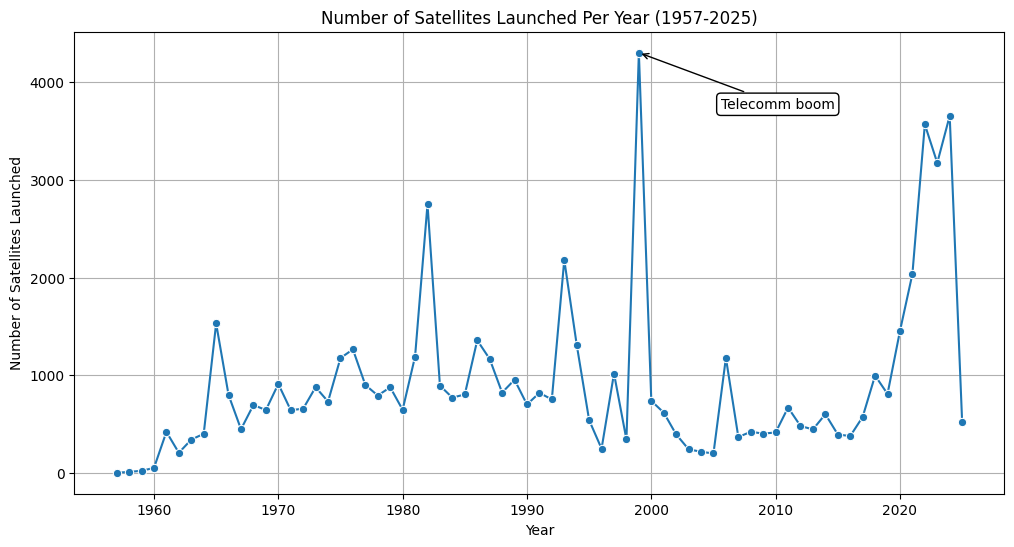

In [54]:
df = pd.read_csv('satcat.tsv', sep='\t', low_memory=False)
df['Year'] = pd.to_datetime(df['LDate'], errors='coerce').dt.year
launches_per_year = df.groupby('Year').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=launches_per_year, x='Year', y='Count', marker='o')
plt.title('Number of Satellites Launched Per Year (1957-2025)')
plt.xlabel('Year')
plt.ylabel('Number of Satellites Launched')
plt.grid(True)
plt.annotate(
    'Telecomm boom',
    xy=(1999,4300),  
    xytext=(100, -40), 
    textcoords='offset points',
    ha='center',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
    arrowprops=dict(arrowstyle='->', color='black')  
)

plt.show()

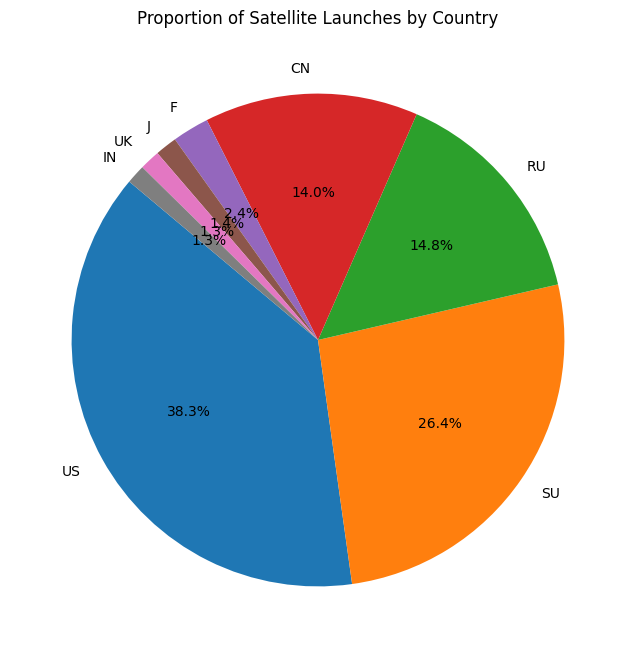

In [18]:
df = pd.read_csv('satcat.tsv', sep='\t', low_memory=False)
launches_by_country = df['State'].value_counts()

countries = ['US', 'SU', 'RU','CN','F','J','UK','IN']
df_filtered = df[df['State'].isin(countries)]

launches_by_country = df_filtered['State'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(launches_by_country, labels=launches_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Satellite Launches by Country')
plt.show()

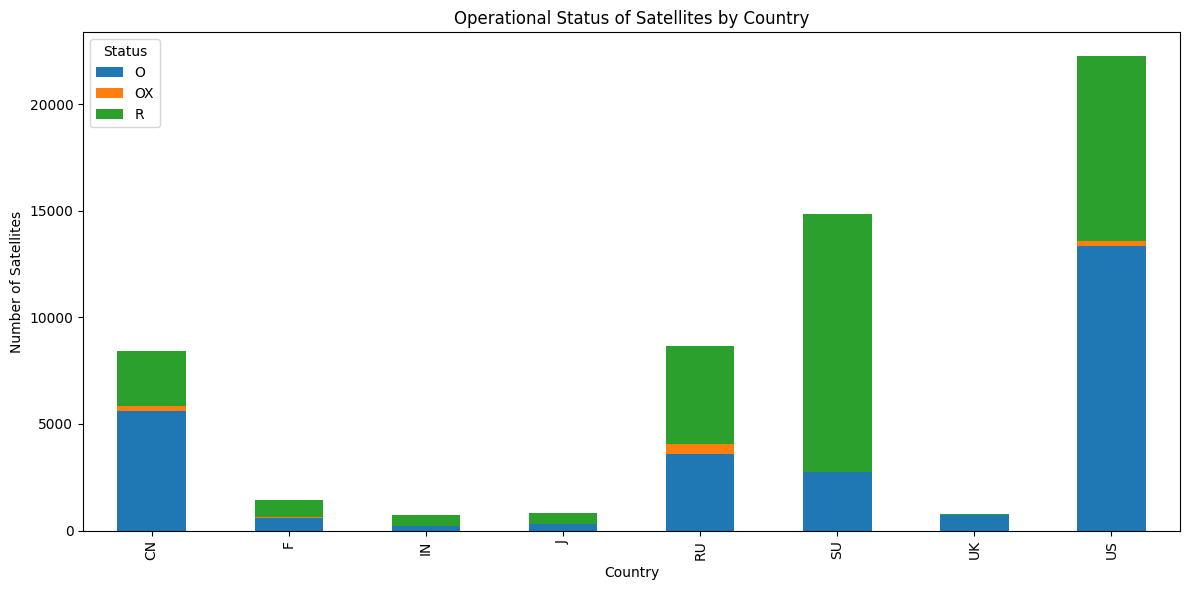

In [35]:
df = pd.read_csv('satcat.tsv', sep='\t', low_memory=False)


# Filter the data by country
countries = ['US', 'SU', 'RU', 'CN', 'F', 'J', 'UK', 'IN']
df_filtered = df[df['State'].isin(countries)]

# Focus on the important statuses
important_statuses = ['O', 'R', 'OX']
df_filtered = df_filtered[df_filtered['Status'].isin(important_statuses)]

# Count the number of satellites for each operational status by country
status_counts = df_filtered.groupby(['State', 'Status']).size().unstack().fillna(0)

# Plot the data
status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Operational Status of Satellites by Country')
plt.xlabel('Country')
plt.ylabel('Number of Satellites')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

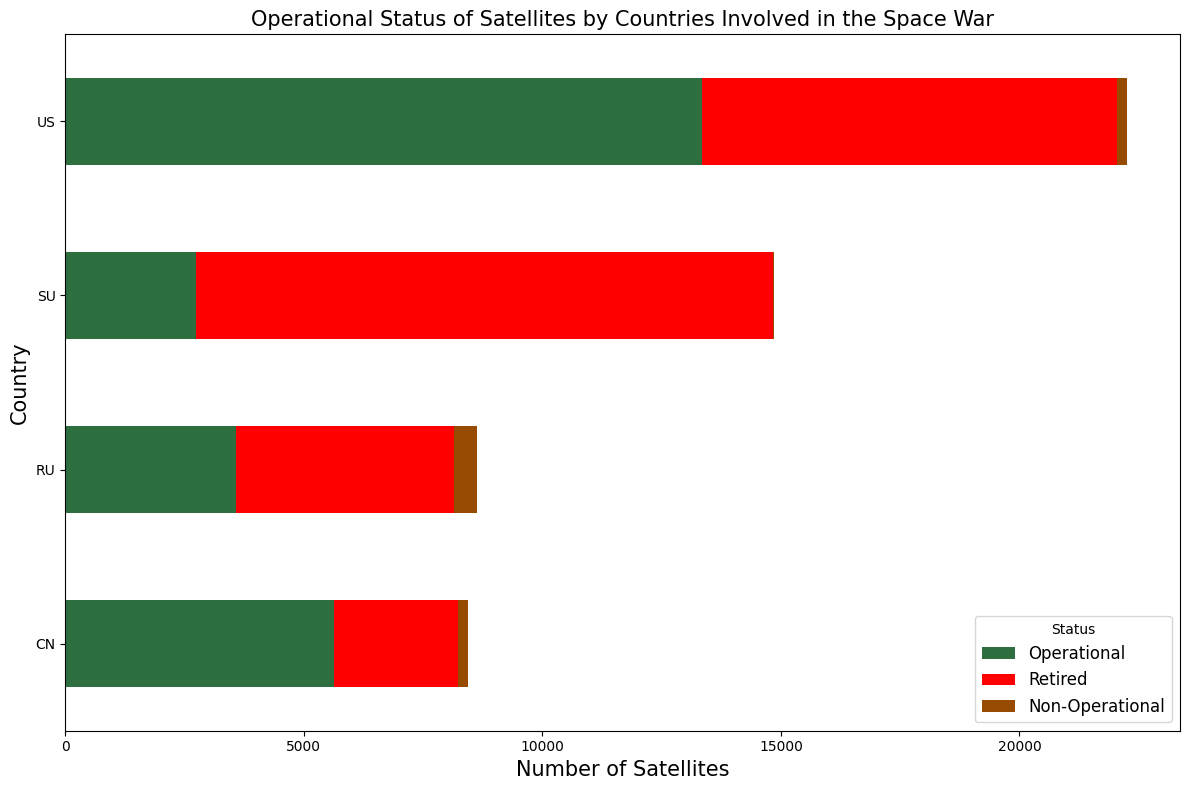

In [48]:
df = pd.read_csv('satcat.tsv', sep='\t', low_memory=False)

countries = ['US', 'SU', 'RU', 'CN']
df_filtered = df[df['State'].isin(countries)]

status_mapping = {'O': 'Operational', 'R': 'Retired', 'OX': 'Non-Operational'}
df_filtered = df_filtered[df_filtered['Status'].isin(status_mapping.keys())]

df_filtered['Status'] = df_filtered['Status'].map(status_mapping)

status_counts = df_filtered.groupby(['State', 'Status']).size().unstack().fillna(0)

status_counts = status_counts[['Operational', 'Retired', 'Non-Operational']]

status_counts['Total'] = status_counts.sum(axis=1)

status_counts = status_counts.sort_values(by='Total', ascending=True).drop(columns='Total')

status_counts.plot(kind='barh', stacked=True, figsize=(12, 8),
                   color={'Operational': '#2E6F40', 'Retired': '#FF0000', 'Non-Operational': '#964B00'})
plt.title('Operational Status of Satellites by Countries Involved in the Space War',fontsize=15)
plt.xlabel('Number of Satellites',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.legend(title='Status', fontsize=12)
plt.tight_layout()
plt.show()

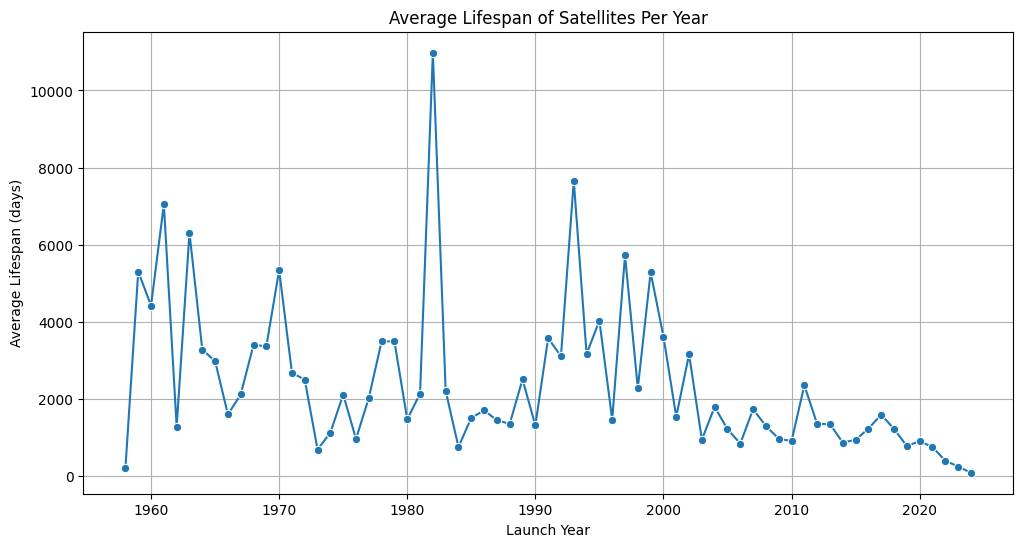

In [56]:
df['LDate'] = pd.to_datetime(df['LDate'])
df['DDate'] = pd.to_datetime(df['DDate'])

df = df.dropna(subset=['DDate'])

df['Lifespan'] = (df['DDate'] - df['LDate']).dt.days

df['Launch_Year'] = df['LDate'].dt.year

average_lifespan_per_year = df.groupby('Launch_Year')['Lifespan'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_lifespan_per_year, x='Launch_Year', y='Lifespan', marker='o')
plt.title('Average Lifespan of Satellites Per Year')
plt.xlabel('Launch Year')
plt.ylabel('Average Lifespan (days)')
plt.grid(True)

plt.show()

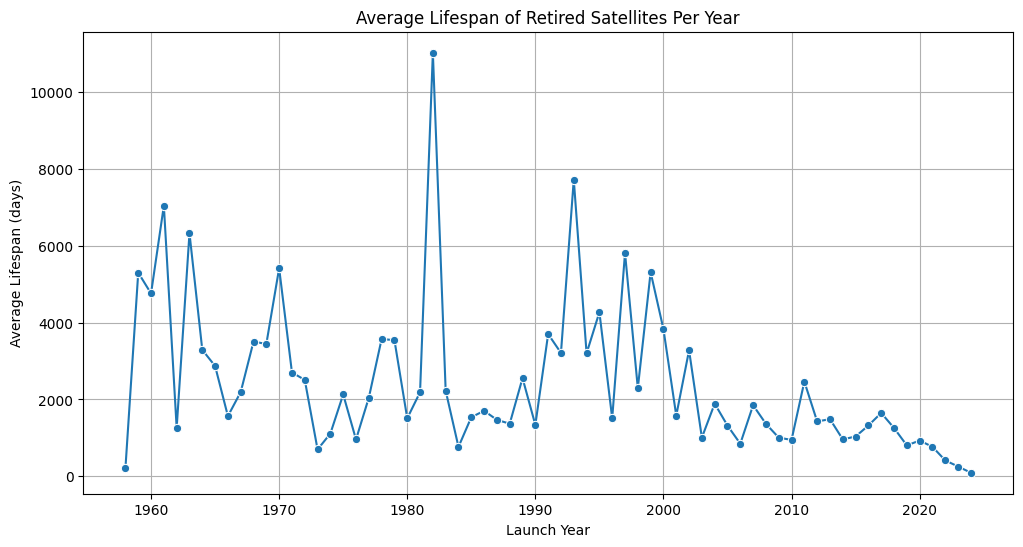

In [57]:
df['LDate'] = pd.to_datetime(df['LDate'], errors='coerce')
df['DDate'] = pd.to_datetime(df['DDate'], errors='coerce')

# Filter out rows with missing 'DDate'
df = df.dropna(subset=['DDate'])

# Calculate the lifespan of each satellite
df['Lifespan'] = (df['DDate'] - df['LDate']).dt.days

# Extract the launch year
df['Launch_Year'] = df['LDate'].dt.year

# Filter only retired satellites
retired_df = df[df['Status'].isin(['R', 'AR', 'DSO', 'N'])]

# Calculate the average lifespan per launch year for retired satellites
average_lifespan_per_year_retired = retired_df.groupby('Launch_Year')['Lifespan'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_lifespan_per_year_retired, x='Launch_Year', y='Lifespan', marker='o')
plt.title('Average Lifespan of Retired Satellites Per Year')
plt.xlabel('Launch Year')
plt.ylabel('Average Lifespan (days)')
plt.grid(True)
plt.show()

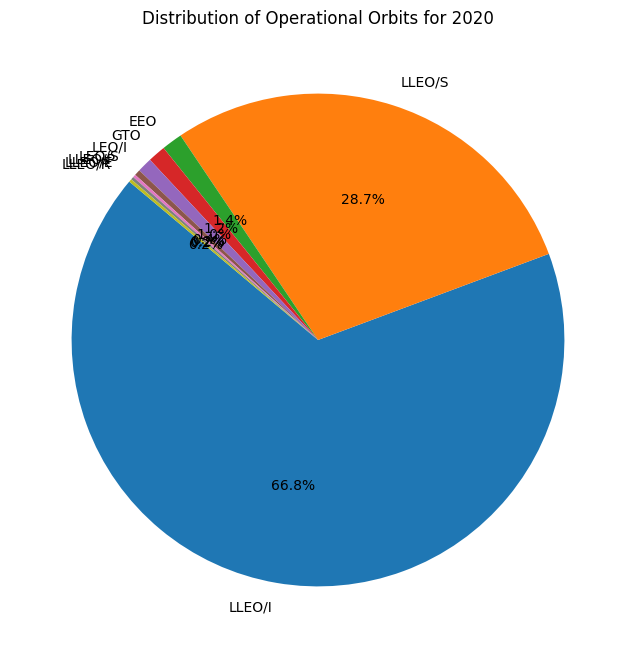

In [58]:
df['Launch_Year'] = pd.to_datetime(df['LDate']).dt.year

# Filter the data by year (Example: 2020)
year = 2020
df_year = df[df['Launch_Year'] == year]

# Count the number of satellites for each operational orbit
oporbit_counts_year = df_year['OpOrbit'].value_counts()

# Plot the data
plt.figure(figsize=(8, 8))
plt.pie(oporbit_counts_year, labels=oporbit_counts_year.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Operational Orbits for {year}')
plt.show()

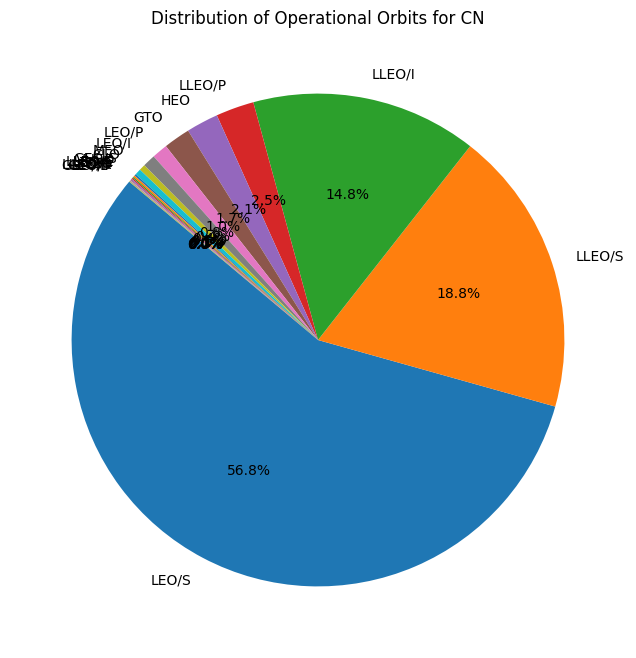

In [60]:
country = 'CN'
df_country = df[df['State'] == country]

# Count the number of satellites for each operational orbit
oporbit_counts = df_country['OpOrbit'].value_counts()

# Plot the data
plt.figure(figsize=(8, 8))
plt.pie(oporbit_counts, labels=oporbit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Operational Orbits for {country}')
plt.show()

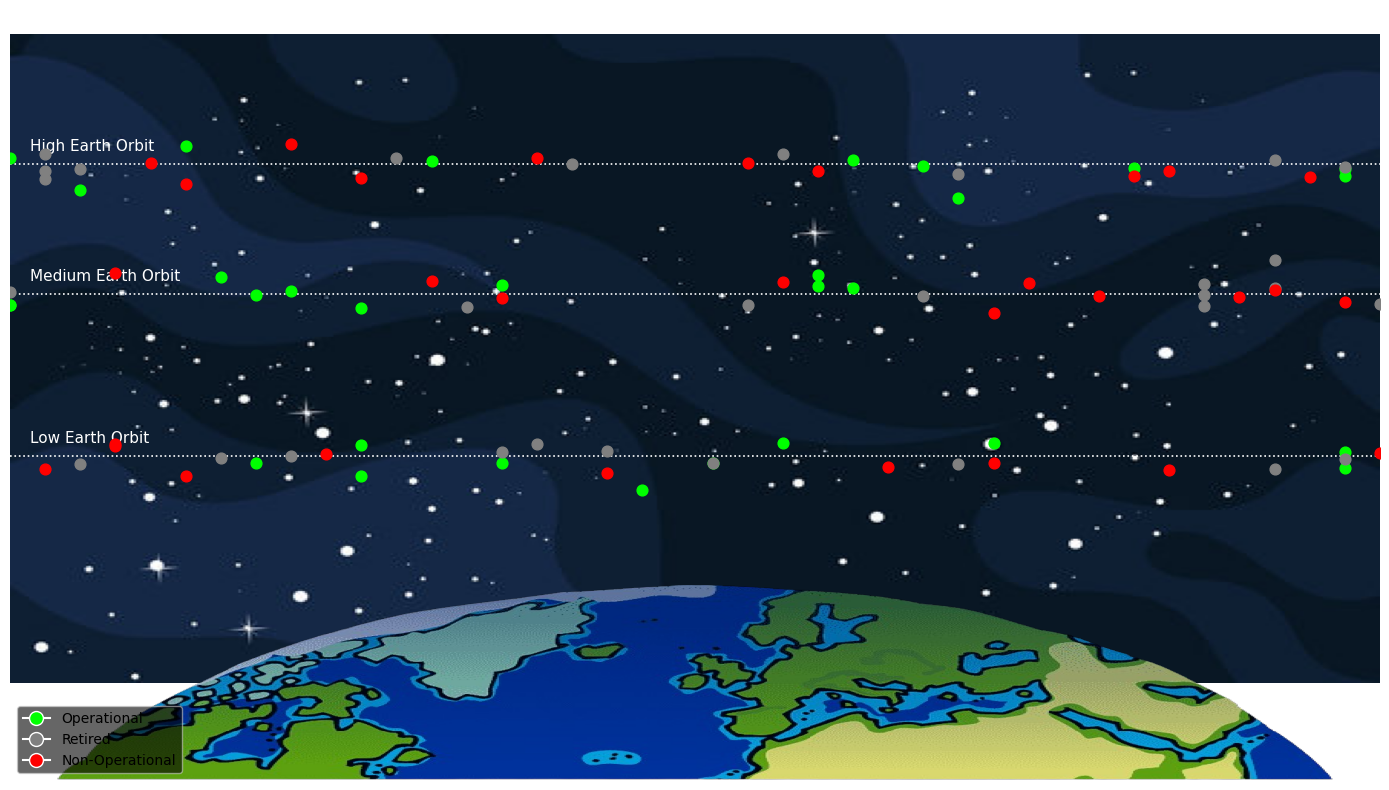

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

# Load images
space_bg = mpimg.imread("space_background.jpg")  # Must be widescreen-ish
earth_img = mpimg.imread("earth_half.png")       # Bottom half of Earth

# Setup
fig, ax = plt.subplots(figsize=(14, 8))

# Display starry background
ax.imshow(space_bg, extent=[1957, 2025, 0, 10], aspect='auto')

# Place Earth at the bottom
ax.imshow(earth_img, extent=[1957, 2025, -1.5, 1.5], aspect='auto', zorder=3)

# Orbit Bands
orbits = {
    'Low Earth Orbit': 3.5,
    'Medium Earth Orbit': 6,
    'High Earth Orbit': 8
}
for name, y in orbits.items():
    ax.hlines(y, xmin=1957, xmax=2025, color='white', linestyle='dotted', linewidth=1.2)
    ax.text(1958, y + 0.2, name, color='white', fontsize=11)

# Generate random satellite positions (for illustration)
np.random.seed(42)
years = np.linspace(1957, 2025, 40)
sat_types = ['Operational', 'Retired', 'Non-Operational']
colors = {'Operational': 'lime', 'Retired': 'grey', 'Non-Operational': 'red'}

for orbit_name, y_base in orbits.items():
    for sat_type in sat_types:
        x_vals = np.random.choice(years, 10)
        y_vals = y_base + np.random.normal(0, 0.2, size=10)
        ax.scatter(x_vals, y_vals, color=colors[sat_type], s=60, label=sat_type if orbit_name == 'Low Earth Orbit' else "", zorder=4)

# Decorations
ax.set_xlim(1957, 2025)
ax.set_ylim(-1.5, 10)
ax.set_title("Satellites in Orbit Over Time", color='white', fontsize=16)
ax.axis('off')

# Custom Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Operational', markerfacecolor='lime', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Retired', markerfacecolor='grey', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Non-Operational', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements, loc='lower left', facecolor='black', framealpha=0.6)

plt.tight_layout()
plt.show()
